In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing



In [7]:
# 1. Load the built-in dataset
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

In [8]:
# Add the target variable (Price) to the dataframe
df['MedHouseVal'] = housing_data.target

# 2. Quick Look
print(f"Dataset Shape: {df.shape}")
print("\n--- First 5 Rows ---")
display(df.head())

# 3. Check for Missing Values (Though built-in sets are usually clean)
print("\n--- Missing Values ---")
print(df.isnull().sum().sum())

# 4. Statistical Summary
print("\n--- Target Variable Summary (House Price) ---")
print(df['MedHouseVal'].describe())


Dataset Shape: (20640, 9)

--- First 5 Rows ---


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



--- Missing Values ---
0

--- Target Variable Summary (House Price) ---
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


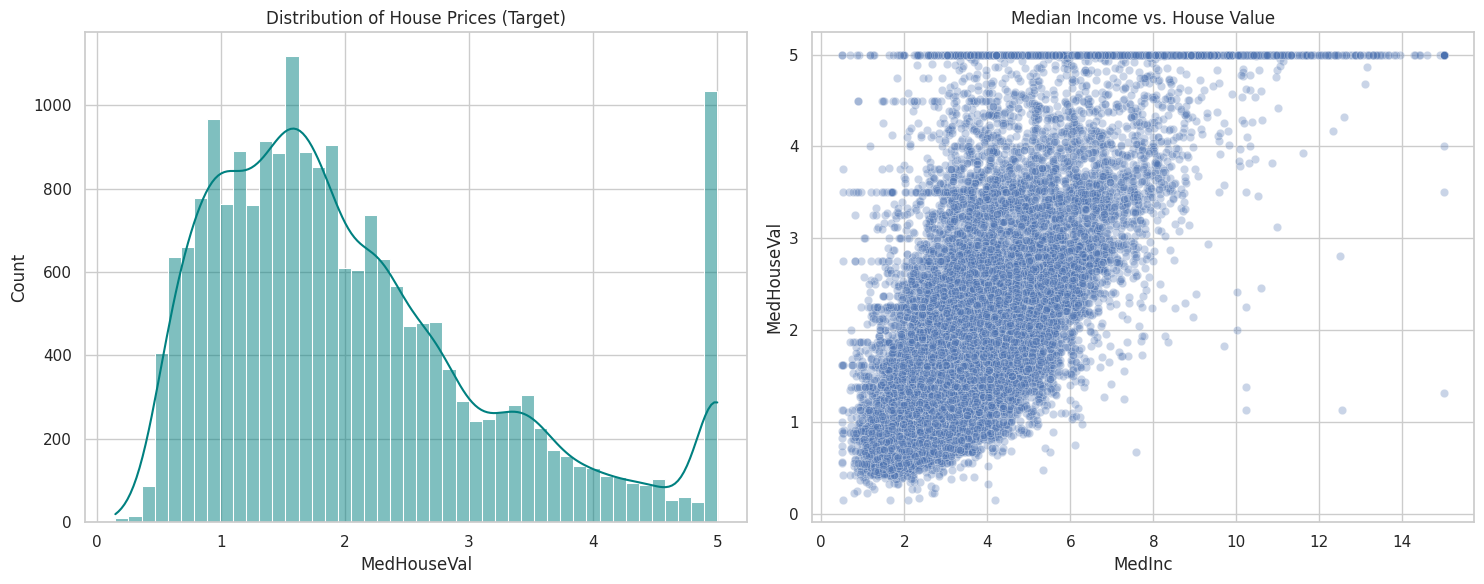

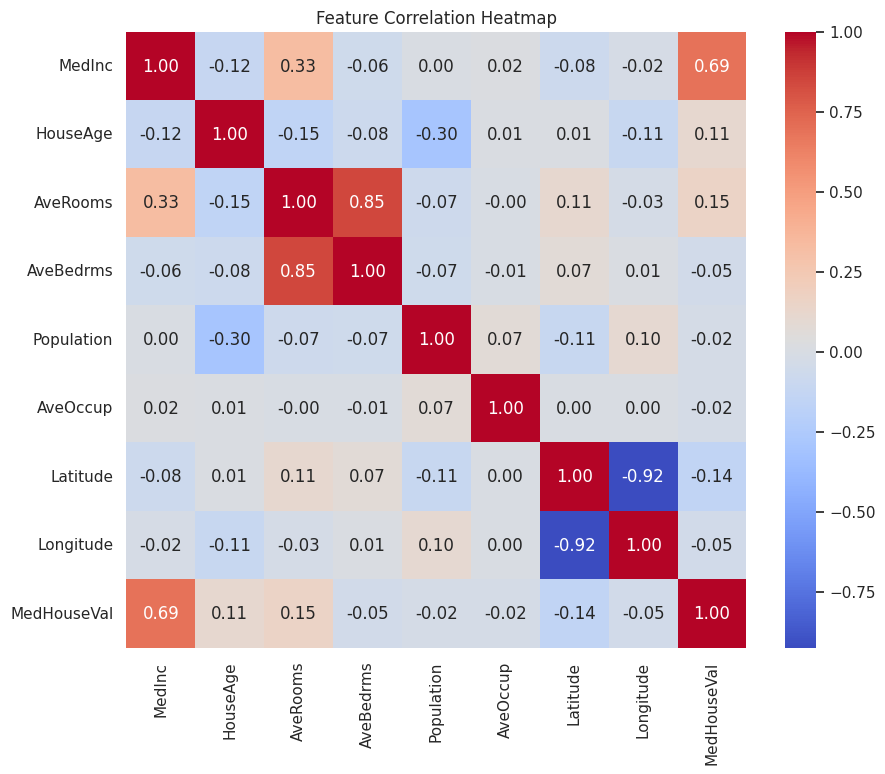

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# 1. Distribution of House Prices
plt.subplot(1, 2, 1)
sns.histplot(df['MedHouseVal'], kde=True, color='teal')
plt.title('Distribution of House Prices (Target)')

# 2. Relationship between Income and Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal', alpha=0.3)
plt.title('Median Income vs. House Value')

plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [10]:
# 1. Remove the 'capped' values (houses exactly at 5.0)
df_clean = df[df['MedHouseVal'] < 5.0].copy()

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# 2. Split data into Features (X) and Target (y)
X = df_clean.drop('MedHouseVal', axis=1)
y = df_clean['MedHouseVal']

# 3. Split into Training and Testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Split Results ---")
print(f"Training features: {X_train.shape}")
print(f"Testing features: {X_test.shape}")


Original shape: (20640, 9)
Cleaned shape: (19648, 9)
Rows removed: 992

--- Split Results ---
Training features: (15718, 8)
Testing features: (3930, 8)


Linear Regression RMSE: 0.6429
Random Forest RMSE: 0.4652


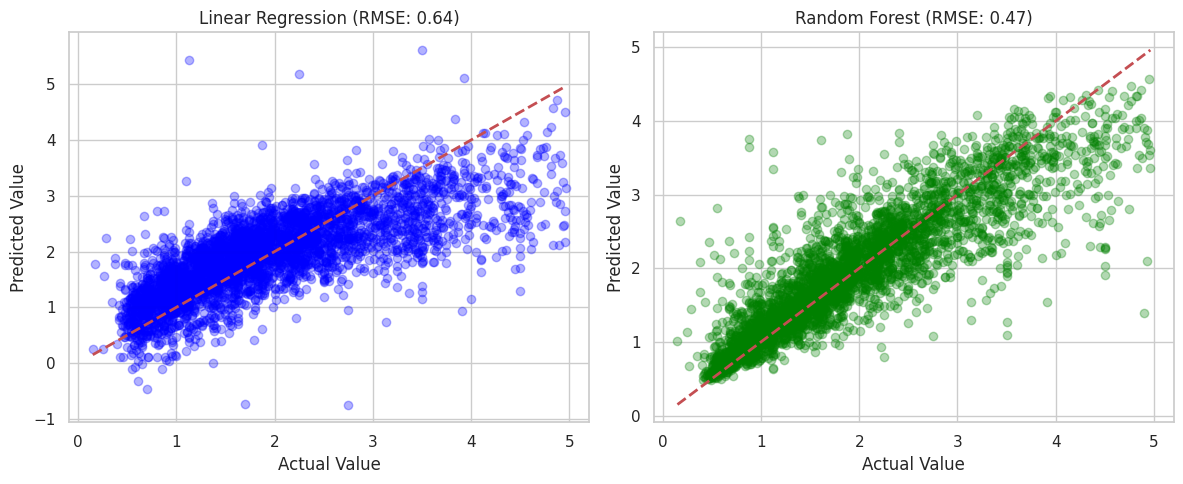

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train (Fit) the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 3. Make Predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# 4. Calculate RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")

# 5. Visualize the 'Prediction Error'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_preds, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Linear Regression (RMSE: {lr_rmse:.2f})')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_preds, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Random Forest (RMSE: {rf_rmse:.2f})')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.tight_layout()
plt.show()

/tmp/ipython-input-197882522.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


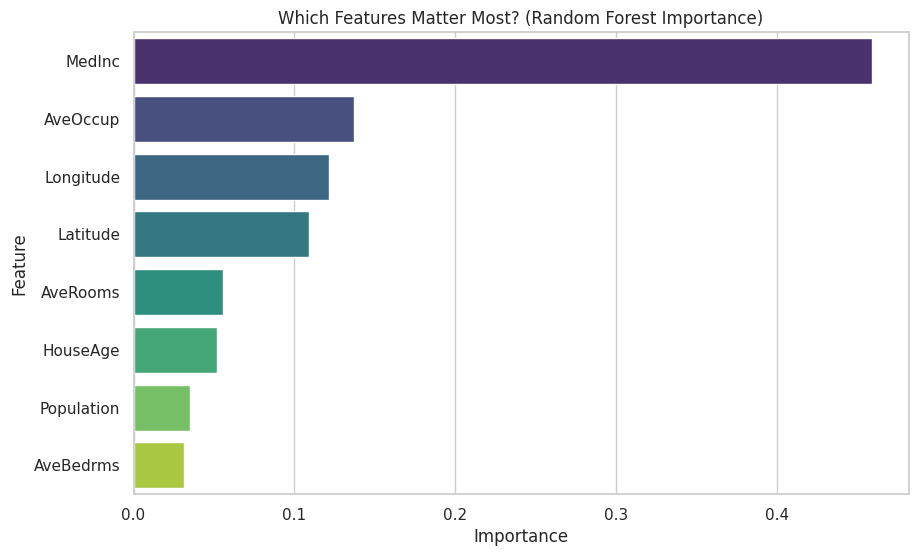

Model Explained Variance (R^2) on Training: 96.98%
Model Explained Variance (R^2) on Testing: 77.43%


In [12]:
# 1. Get Feature Importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 2. Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which Features Matter Most? (Random Forest Importance)')
plt.show()

# 3. Final Metric: R-squared (The 'Score')
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print(f"Model Explained Variance (R^2) on Training: {train_score:.2%}")
print(f"Model Explained Variance (R^2) on Testing: {test_score:.2%}")